# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')


# Load The Data

In [2]:
df=pd.read_csv("Electric_cars.csv")


In [3]:
df.head()

,Country,City,State,Model Year,Company,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,Kitsap,Olalla,WA,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26
1,Snohomish,Bothell,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93
2,Thurston,Olympia,WA,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
3,Kitsap,Bremerton,WA,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26
4,Thurston,Olympia,WA,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239


In [4]:
df.tail()

,Country,City,State,Model Year,Company,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
9007,Snohomish,Edmonds,WA,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125
9008,Franklin,Eltopia,WA,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
9009,Island,Langley,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93
9010,Skagit,Anacortes,WA,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26
9011,Pierce,Tacoma,WA,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26


In [5]:
df.shape

(9012, 9)

In [6]:
df.describe()

,Model Year,Electric Range
count,9012.000000,9012.000000
mean,2020.273413,49.979028
std,2.239126,72.087426
min,2014.000000,0.000000
25%,2019.000000,0.000000
50%,2021.000000,26.000000
75%,2022.000000,83.000000
max,2023.000000,239.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Country                                            9012 non-null   object
 1   City                                               9012 non-null   object
 2   State                                              9012 non-null   object
 3   Model Year                                         9012 non-null   int64 
 4   Company                                            9012 non-null   object
 5   Model                                              9012 non-null   object
 6   Electric Vehicle Type                              9012 non-null   object
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  9012 non-null   object
 8   Electric Range                                     9012 non-null   int64 
dtypes: int64(2), object(

In [8]:
df.isna().sum()

Country                                              0
City                                                 0
State                                                0
Model Year                                           0
Company                                              0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
dtype: int64

In [9]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print("\n\n",column_name)
    print("=============================")
    print(df[column_name].unique().tolist(),"\n")
    print("NaN values",df[column_name].isna().sum(),"\n")
    print(df[column_name].value_counts())



 Country
['Kitsap', 'Snohomish', 'Thurston', 'Whitman', 'King', 'Kittitas', 'San Juan', 'Spokane', 'Clark', 'Klickitat', 'Benton', 'Whatcom', 'Sonoma', 'Island', 'Cowlitz', 'Pierce', 'Grays Harbor', 'Lewis', 'Yakima', 'Clallam', 'Mason', 'Skagit', 'Jefferson', 'Chelan', 'Grant', 'Stevens', 'Walla Walla', 'Okanogan', 'Franklin', 'Douglas', 'Pend Oreille', 'St. Tammany', 'Salt Lake', 'Skamania', 'Pacific', 'Solano', 'Lincoln', 'Marin', 'Alexandria', 'Riverside', 'Onslow', 'Asotin', 'Anne Arundel', 'Orange', 'Wahkiakum', 'Sarpy', 'Rockdale', 'Doña Ana', 'San Bernardino'] 

NaN values 0 

King              4301
Snohomish          963
Pierce             753
Clark              560
Thurston           437
Kitsap             351
Whatcom            340
Spokane            253
Island             141
Skagit             137
Benton             102
Jefferson           82
San Juan            67
Clallam             64
Yakima              52
Mason               49
Grays Harbor        47
Cowlitz        

# Data Preprocessing

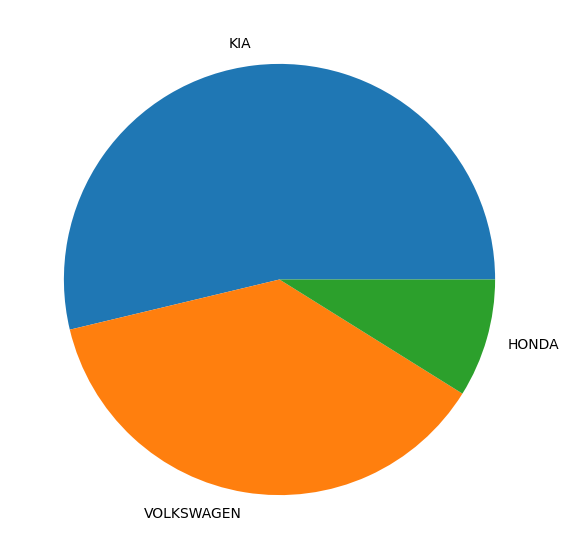

In [10]:
cars = ['KIA', 'VOLKSWAGEN', 'HONDA']
 
data =[]
a=0
b=0
c=0
for i in range(len(df['Company'])):
    if(df['Company'][i]=="KIA"):
        a+=1
    elif(df['Company'][i]=='VOLKSWAGEN'):
        b+=1
    else:
        c+=1
data.append(a)
data.append(b)
data.append(c)
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
 
# show plot
plt.show()

In [11]:
df["Company"].unique()

array(['KIA', 'VOLKSWAGEN', 'HONDA'], dtype=object)

In [12]:
le = LabelEncoder()

categories=['Country','City','State','Model Year','Company','Model','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Range']

for i in categories:
    df[i]=le.fit_transform(df[i])

In [13]:
df.head()

,Country,City,State,Model Year,Company,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,16,188,9,5,1,5,1,2,2
1,37,21,9,2,1,8,0,0,10
2,43,190,9,8,1,3,0,1,0
3,16,23,9,5,1,5,1,2,2
4,43,190,9,5,1,5,0,0,13


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Country                                            9012 non-null   int32
 1   City                                               9012 non-null   int32
 2   State                                              9012 non-null   int32
 3   Model Year                                         9012 non-null   int64
 4   Company                                            9012 non-null   int32
 5   Model                                              9012 non-null   int32
 6   Electric Vehicle Type                              9012 non-null   int32
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  9012 non-null   int32
 8   Electric Range                                     9012 non-null   int64
dtypes: int32(7), int64(2)
memory us

<AxesSubplot:>

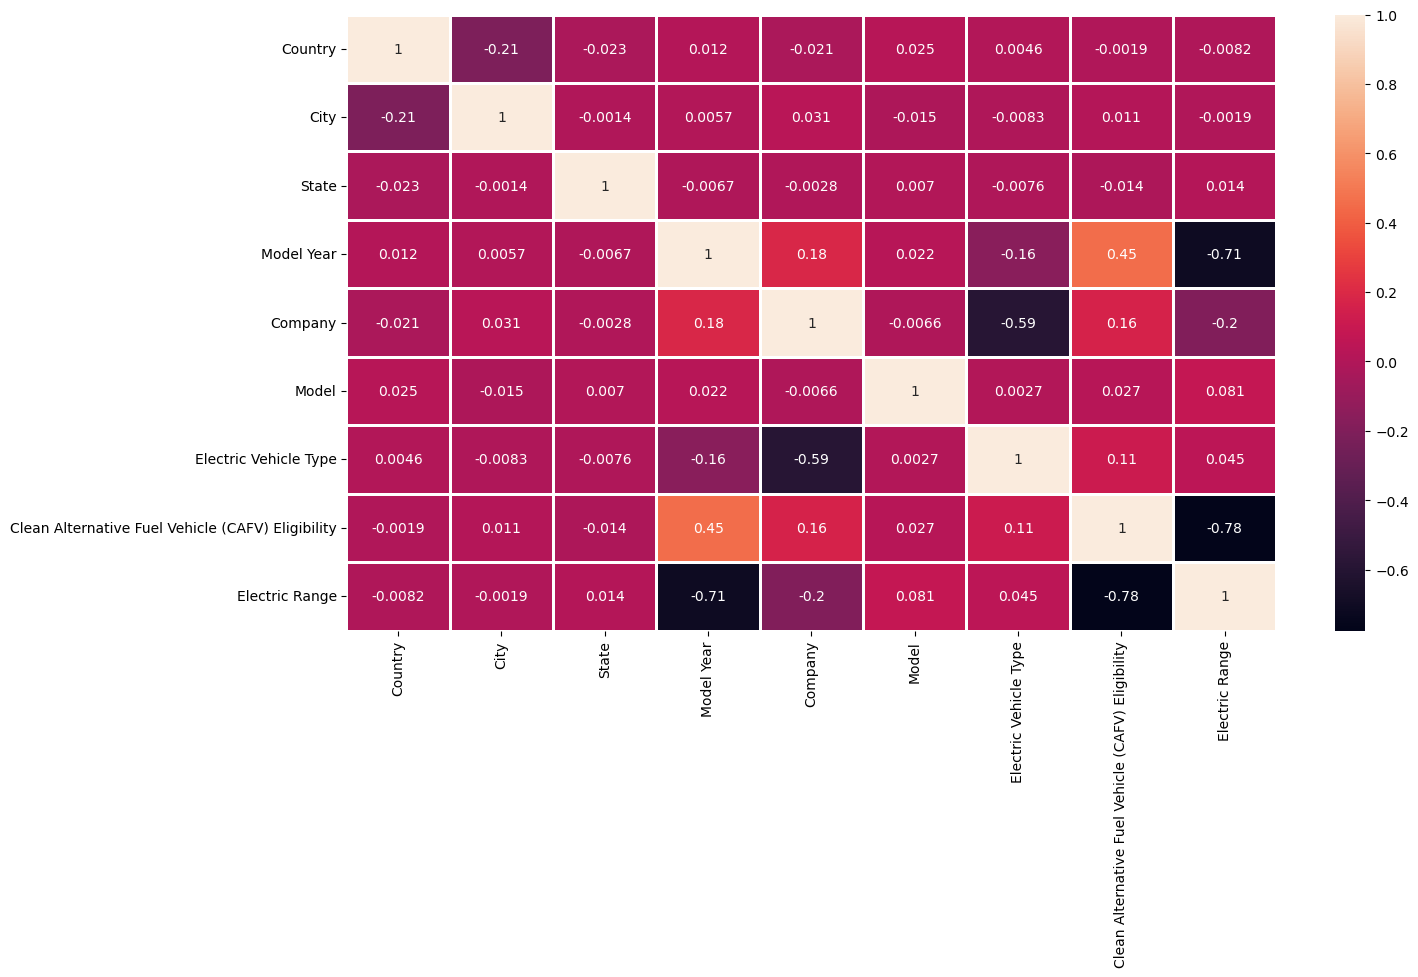

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linecolor="white",linewidths=1,annot=True)


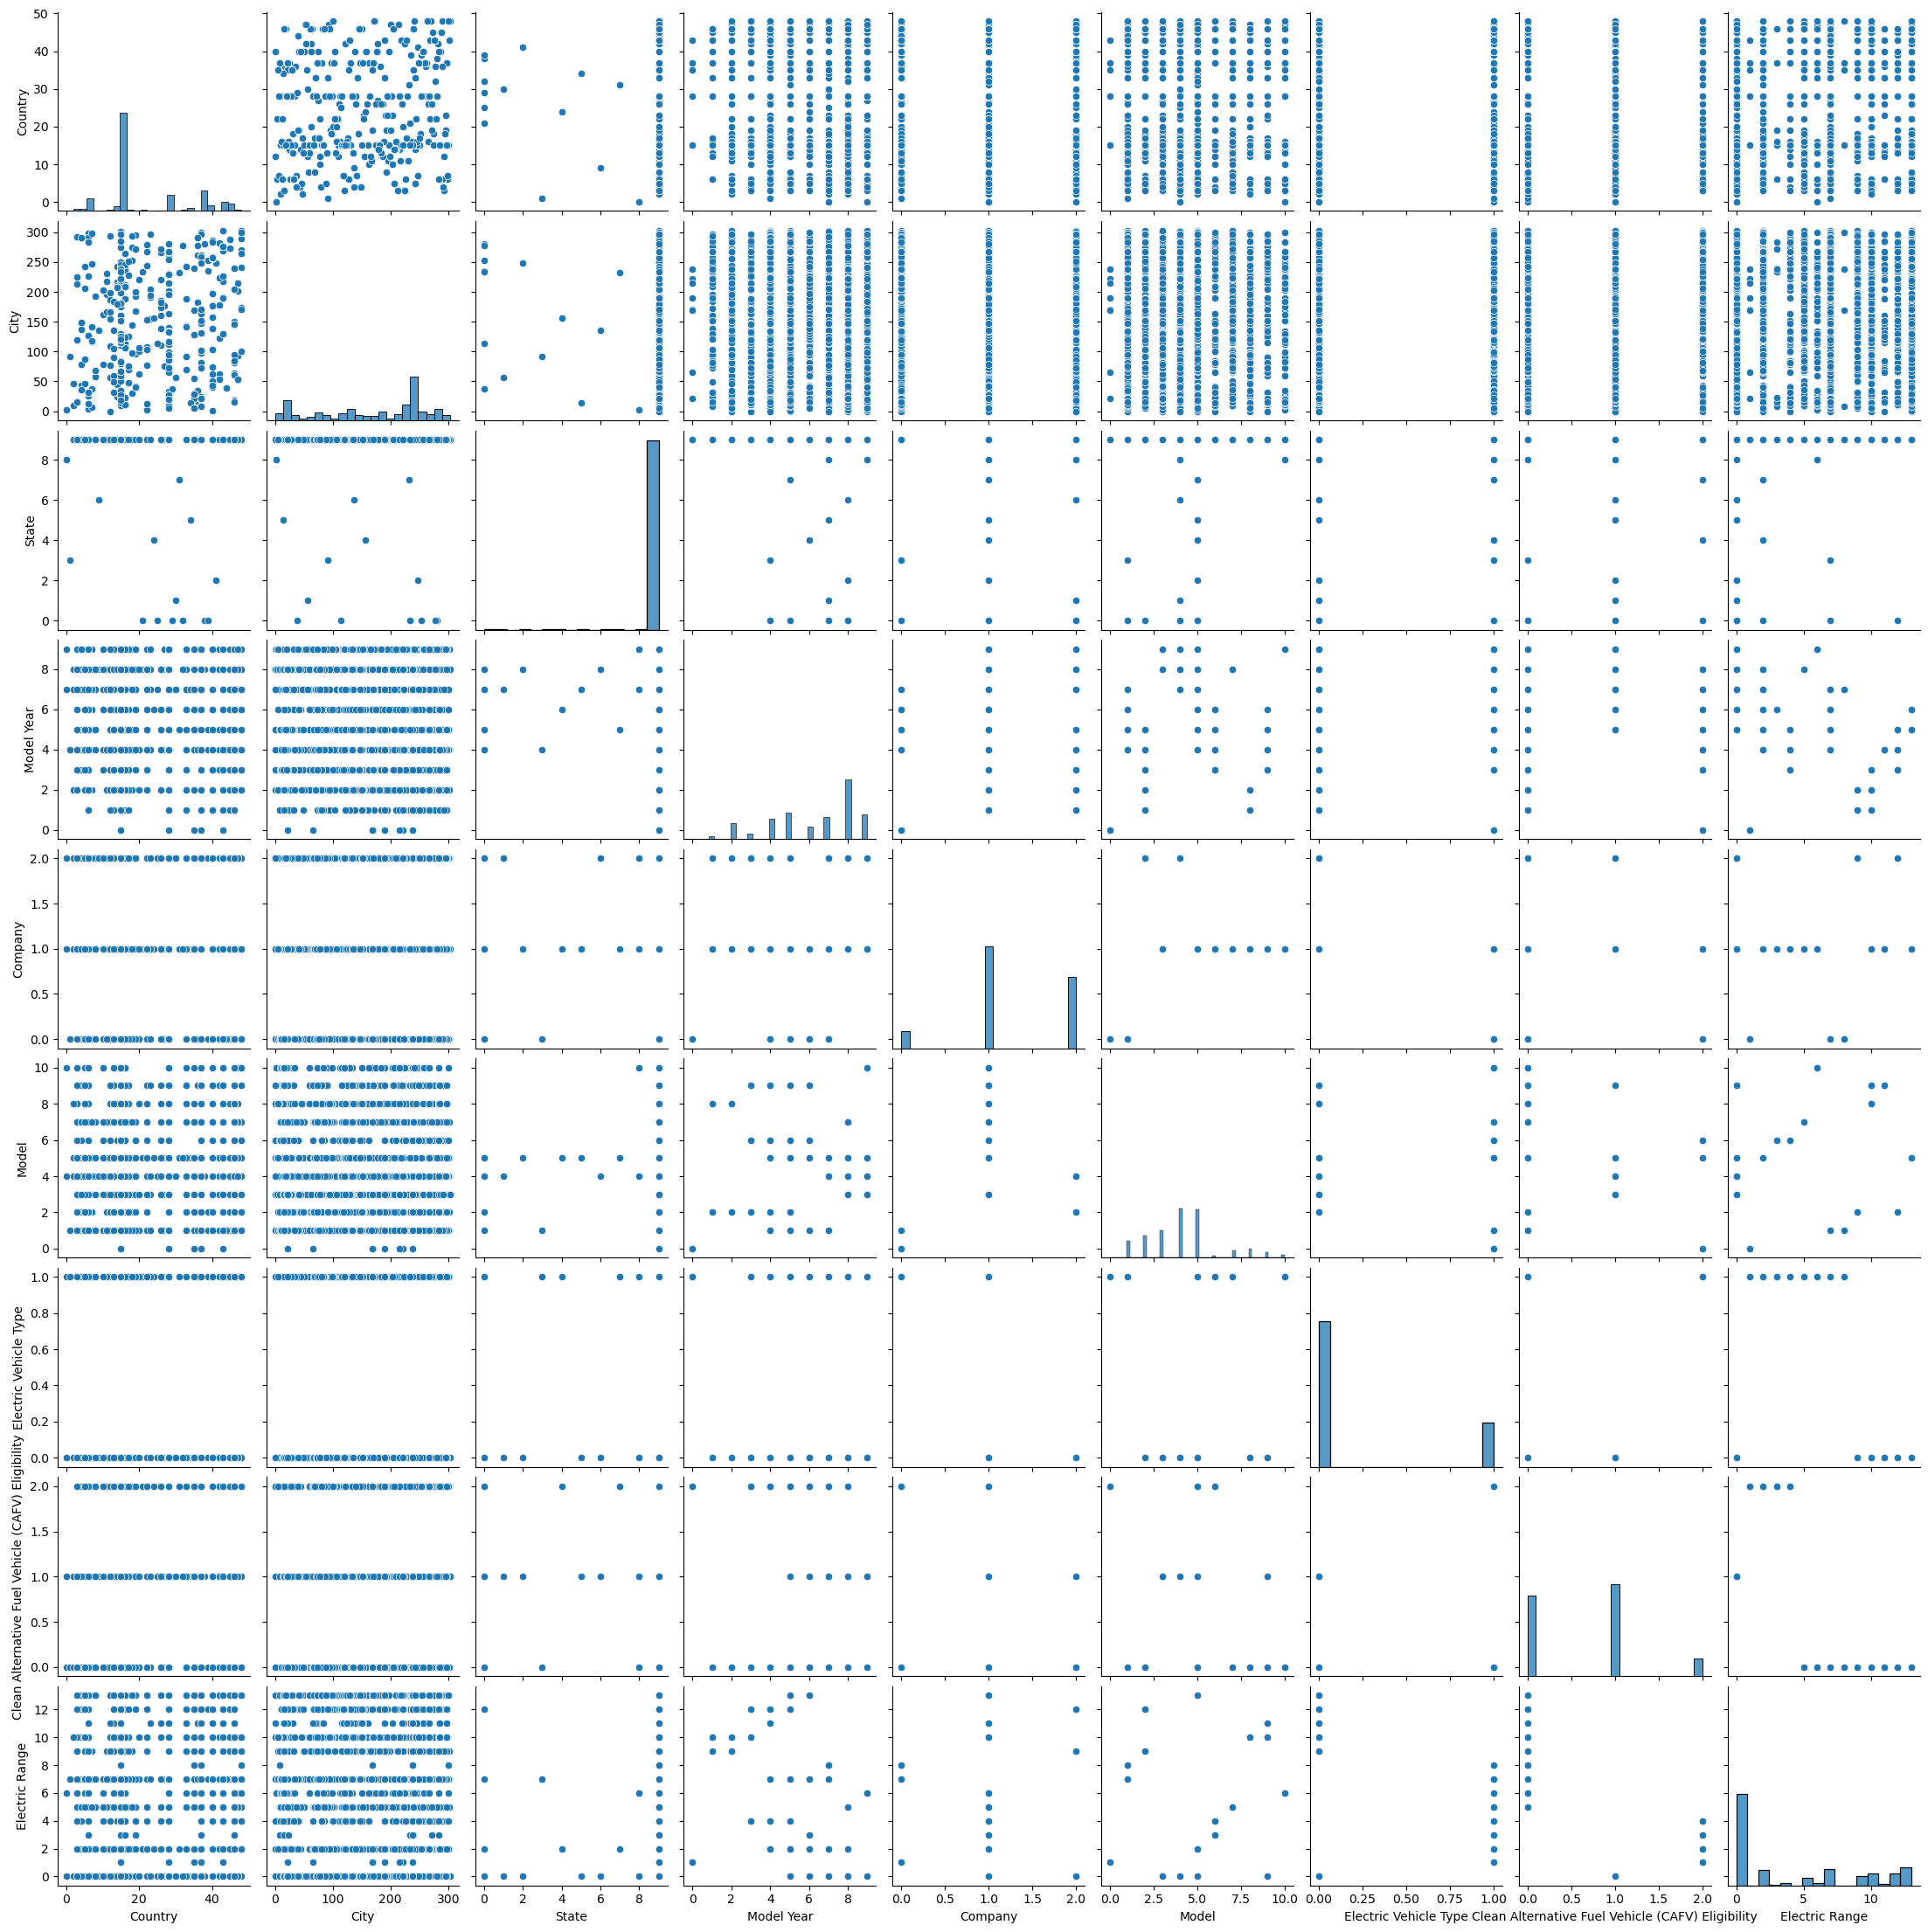

In [16]:
sns.pairplot(df)

In [17]:
df=df.drop(["City","State","Model Year","Clean Alternative Fuel Vehicle (CAFV) Eligibility",'Electric Vehicle Type',"Country"],axis=1)

In [18]:
df.head()

,Company,Model,Electric Range
0,1,5,2
1,1,8,10
2,1,3,0
3,1,5,2
4,1,5,13


# Data Visualization

<AxesSubplot:xlabel='Company', ylabel='Count'>

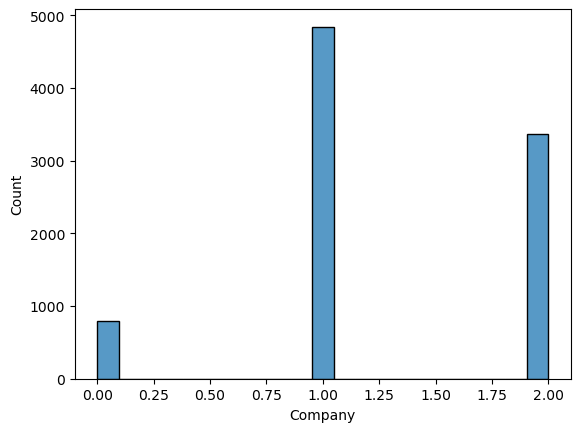

In [19]:
sns.histplot(df.Company)


<AxesSubplot:xlabel='Model', ylabel='Density'>

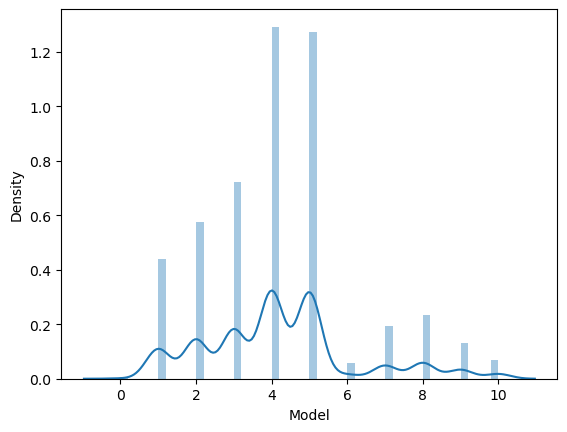

In [20]:
sns.distplot(df.Model)

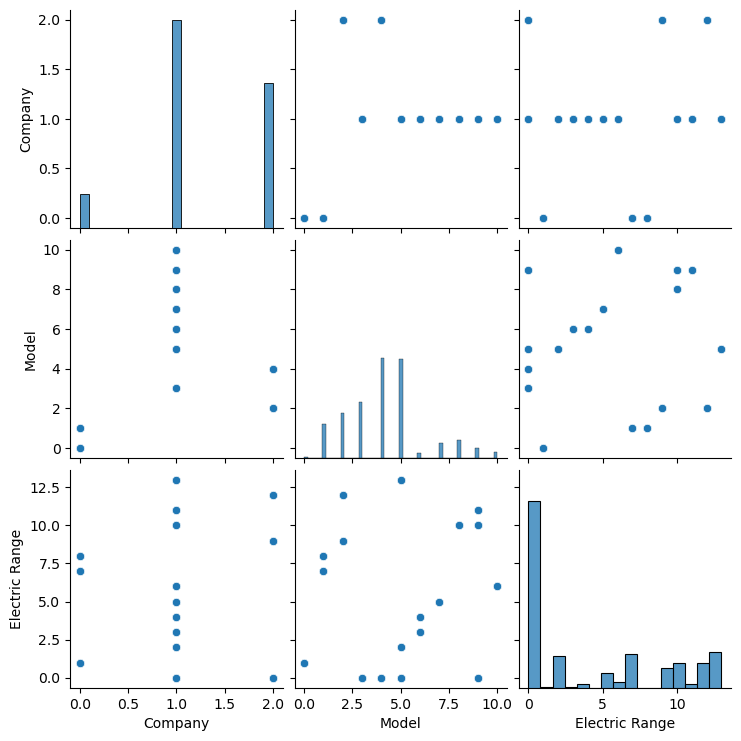

In [21]:
sns.pairplot(df)

In [22]:
x=df.iloc[:,1:].values


In [23]:
x

array([[ 5,  2],
       [ 8, 10],
       [ 3,  0],
       ...,
       [ 8, 10],
       [ 5,  2],
       [ 5,  2]], dtype=int64)

In [24]:
scaler=StandardScaler()
df=scaler.fit_transform(x)

## PCA(Principle Component Analysis)

In [25]:
pca=PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [26]:
pca.transform(df)

array([[-4.89838858, -3.54622622],
       [-3.22904993, -2.10186024],
       [-5.33999596, -4.53509193],
       ...,
       [-3.22904993, -2.10186024],
       [-4.89838858, -3.54622622],
       [-4.89838858, -3.54622622]])

In [27]:
t=pca.transform(df)
data=pd.DataFrame(t,columns=['PC1','PC2'])
data

,PC1,PC2
0,-4.898389,-3.546226
1,-3.229050,-2.101860
2,-5.339996,-4.535092
3,-4.898389,-3.546226
4,-2.683148,-3.631878
...,...,...
9007,-2.942788,-5.130749
9008,-5.339996,-4.535092
9009,-3.229050,-2.101860
9010,-4.898389,-3.546226


In [28]:
kmeans = KMeans()

In [29]:
y=kmeans.fit_predict(t)
y

array([6, 4, 7, ..., 4, 6, 6])

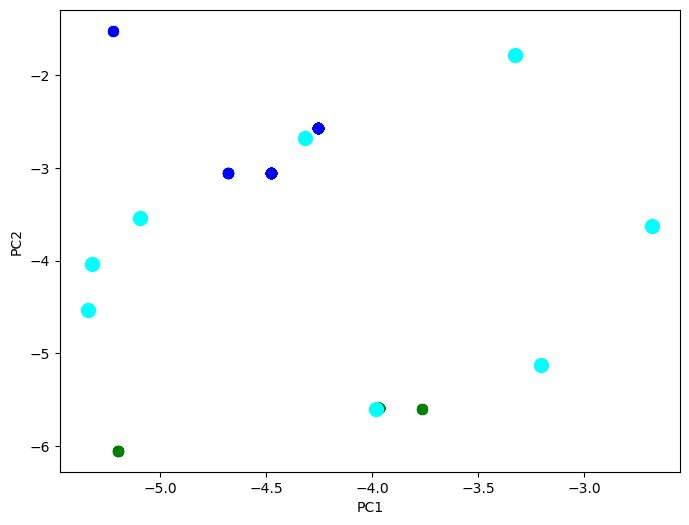

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(t[y==0,0], t[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(t[y==2,0], t[y==2,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(t[y==3,0], t[y==3,1], s=50, c='blue', label='Cluster 3')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
#plt.title('PC!')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [31]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    #kmean.inertia_ is used to find the distance between centdoid and data points

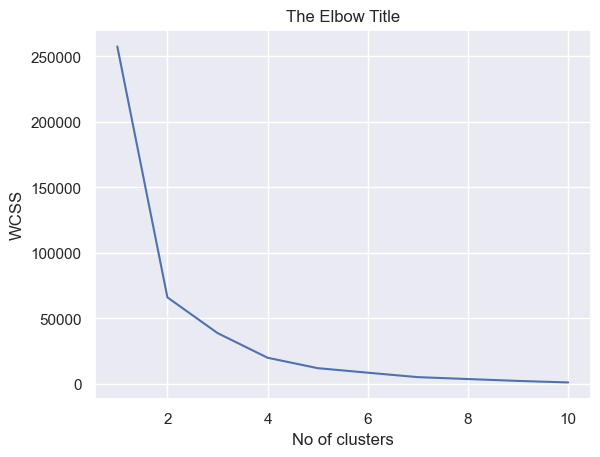

In [32]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Title")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

Model 

In [33]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x)
y_pred=kmeans.fit_predict(x)

In [34]:
y_pred

array([1, 3, 1, ..., 3, 1, 1])

In [35]:
kmeans.cluster_centers_

array([[ 3.76815642, 12.58938547],
       [ 4.06555171,  0.3650519 ],
       [ 1.36363636,  7.73049075],
       [ 8.12334802,  8.08105727]])

In [36]:
kmeans.inertia_

19941.62466784509

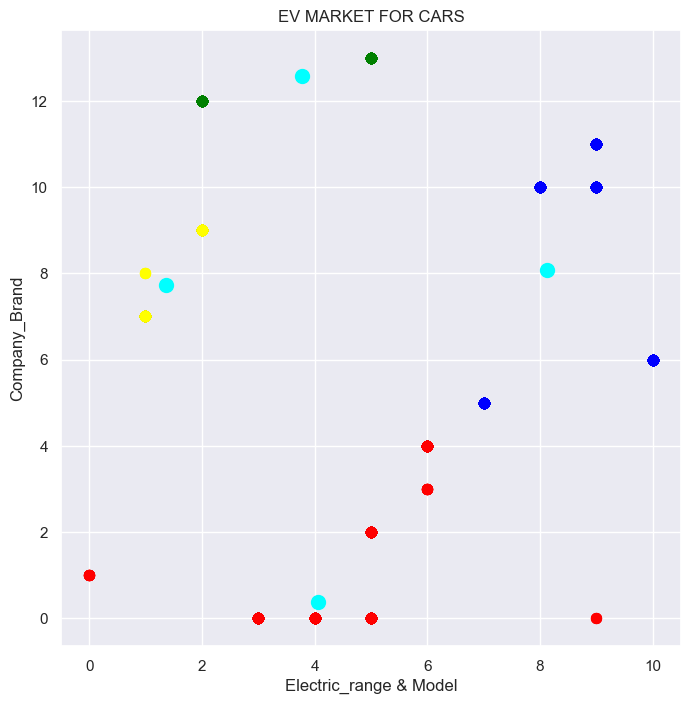

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred==0,0], x[y_pred==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y_pred==1,0], x[y_pred==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y_pred==2,0], x[y_pred==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y_pred==3,0], x[y_pred==3,1], s=50, c='blue', label='Cluster 4')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('EV MARKET FOR CARS')
plt.xlabel('Electric_range & Model')
plt.ylabel('Company_Brand')
plt.show()

# Analysis

In [38]:
df=pd.read_csv("Electric_cars.csv")


In [39]:
df.head(10)

,Country,City,State,Model Year,Company,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,Kitsap,Olalla,WA,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26
1,Snohomish,Bothell,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93
2,Thurston,Olympia,WA,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0
3,Kitsap,Bremerton,WA,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26
4,Thurston,Olympia,WA,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239
5,Whitman,Pullman,WA,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239
6,Snohomish,Everett,WA,2018,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,111
7,King,Seattle,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93
8,King,Fall City,WA,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239
9,Kittitas,Cle Elum,WA,2022,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0


# 1.Electric cars we will focusing on?

In [42]:
"""
1.Model
2.Electric Vehicle Type
3.Clean Alternative Fuel Vehicle (CAFV) Eligibility
4.Electric Range Category
"""




'\n1.Model\n2.Electric Vehicle Type\n3.Clean Alternative Fuel Vehicle (CAFV) Eligibility\n4.Electric Range Category\n'

# 2.Which Company producing more Electric cars?

In [43]:
df['Company'].unique()

array(['KIA', 'VOLKSWAGEN', 'HONDA'], dtype=object)

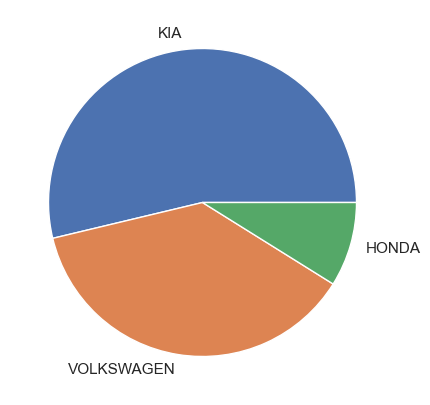

In [44]:
cars = ['KIA', 'VOLKSWAGEN', 'HONDA']
 
data =[]
a=0
b=0
c=0
for i in range(len(df['Company'])):
    if(df['Company'][i]=="KIA"):
        a+=1
    elif(df['Company'][i]=='VOLKSWAGEN'):
        b+=1
    else:
        c+=1
data.append(a)
data.append(b)
data.append(c)
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
plt.pie(data, labels = cars)
plt.show()